# Introduction
We ...

# Preparing the dataset
We merge two different datasets...

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import csv
import numpy as np
import urllib
from math import log

### The Education Index

The UN maintains and publishes an education index which is used by them to compute the Human Development Index. Their dataset, though not perfect, seems much better than the one we got from the worldbank website; especially if we consider it from 1999 onwards. Given that the purpose of the HDI is humanitarian, it suggests to me that this is probably as good a dataset as we’ll find for African countries. It can be downloaded here http://hdr.undp.org/en/indicators/103706. It is defined by the following formula:

$$ EI = \frac{ \frac{EYS}{18} + \frac{MYS}{15} }{2} $$

where $EYS$ is expected years of schooling and $MYS$ is average number of education years students over the age of 25 have actually received.

In [2]:
# ei = pd.read_csv("data/Education_index.csv") 

# data is hosted on GitHub
ei_url = 'https://raw.githubusercontent.com/iatrogenic/Solow-TPROG/main/data/Education_index.csv'

# the commented line above was throwing parsing errors, I think it's because the csv for the EI
# is weirdly formatted.
# We parse it manually below, using python's csv module.
with urllib.request.urlopen(ei_url) as rsp:
    csvfile = [l.decode('latin1') for l in rsp.readlines()]
    ei = csv.reader(csvfile)
    raw = [row[1:] for row in list(ei)[6:-1]]
    # all the even (excluding 0th column) columns are empty, i'll remove them below
    formatted_rows = []
    for row in raw:
        formatted_rows.append([row[0]] + row[1::2])
    
# Maybe there is a simpler way to do this, but this also works.

In [3]:
# Adds column names and converts the list of data to a pandas DataFrame object
cols = ['country'] + list(range(1990, 2020))
education = pd.DataFrame(formatted_rows, columns=cols)

In [4]:
# This is what the Education Index table looks like from 1999 to 2019
education

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,0.122,0.133,0.145,0.156,0.168,0.179,0.190,0.202,0.213,...,0.372,0.374,0.390,0.398,0.403,0.405,0.406,0.408,0.413,0.414
1,Albania,0.583,0.588,0.557,0.542,0.541,0.550,0.557,0.569,0.579,...,0.671,0.714,0.739,0.749,0.758,0.753,0.745,0.747,0.743,0.746
2,Algeria,0.385,0.395,0.405,0.414,0.424,0.431,0.443,0.458,0.473,...,0.626,0.644,0.639,0.639,0.652,0.659,0.660,0.665,0.668,0.672
3,Andorra,..,..,..,..,..,..,..,..,..,...,0.670,0.671,0.724,0.714,0.725,0.718,0.722,0.713,0.720,0.720
4,Angola,..,..,..,..,..,..,..,..,..,...,0.398,0.423,0.435,0.447,0.460,0.472,0.487,0.498,0.500,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Sub-Saharan Africa,0.285,0.290,0.297,0.304,0.310,0.319,0.326,0.332,0.340,...,0.422,0.429,0.437,0.449,0.452,0.457,0.460,0.465,0.466,0.471
202,Least Developed Countries,0.223,0.228,0.233,0.239,0.244,0.251,0.259,0.268,0.277,...,0.388,0.396,0.403,0.408,0.411,0.419,0.424,0.430,0.431,0.437
203,Small Island Developing States,0.466,0.471,0.477,0.483,0.485,0.492,0.500,0.506,0.512,...,0.607,0.613,0.604,0.609,0.615,0.621,0.624,0.628,0.627,0.633
204,Organization for Economic Co-operation and Dev...,0.679,0.688,0.681,0.709,0.720,0.729,0.735,0.728,0.747,...,0.818,0.824,0.828,0.835,0.841,0.846,0.850,0.851,0.852,0.852


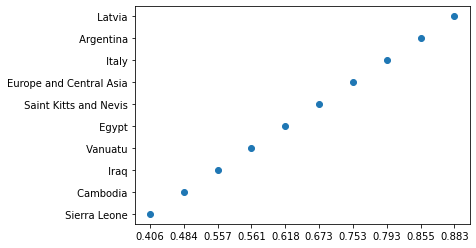

In [5]:
sample = education.sample(10).sort_values(by = 2019, ascending = True)
plt.scatter(sample[2019], sample.country)

## Worldbank & Penn World Table

The rest of our data comes from Worldbank's and Penn World Table's database.

In [6]:
#cpi = pd.read_csv("https://raw.githubusercontent.com/iatrogenic/Solow-TPROG/main/data/time_on_vertical_1996-2020/cpi_base2010.csv")
#cpi = pd.DataFrame(cpi)

work_pop = pd.read_csv('https://raw.githubusercontent.com/iatrogenic/Solow-TPROG/main/data/521aa38d-fdf9-4b04-a31e-e8a12c6753dd_Data.csv')
work_pop = pd.DataFrame(work_pop)

pop_growth = pd.read_csv('https://raw.githubusercontent.com/iatrogenic/Solow-TPROG/main/data/e65a7cf4-b4af-4fca-a1ef-7cd396465237_Data.csv')
pop_growth = pd.DataFrame(pop_growth)

gdp_growth = pd.read_csv('https://raw.githubusercontent.com/iatrogenic/Solow-TPROG/main/data/9dafeb4d-c5ca-4008-9497-8f9612ce8967_Data.csv')
gdp_growth = pd.DataFrame(gdp_growth)

kgdp = pd.read_csv('https://raw.githubusercontent.com/iatrogenic/Solow-TPROG/main/data/11ce0515-b87a-4bff-8ded-98e24d00470f_Data.csv')
kgdp = pd.DataFrame(kgdp)

# import Penn World Table dataset

pwt = pd.read_excel('https://github.com/iatrogenic/Solow-TPROG/blob/main/data/data_PWT/pwt100.xlsx?raw=true', sheet_name = 'Data')
pwt = pd.DataFrame(pwt)

# education data is already imported on the previous section but perhaps should be reshaped so as to match
# the data imported above

In [7]:
# create country name -> country code map
code_map = {}
for row in work_pop[['Country Name', 'Country Code']].drop_duplicates().values.tolist():
    code_map[row[0]] = row[1]
    
# above might not actually be necessary, will remove df1 country code and keep country name instead and see
# if merging works

In [8]:
# transform time to vertical so as to merge with the rest of the dataframes later on
t_education = []
edu_list = education.values.tolist()
for row in edu_list:
    cntr = row[0]
    for year in range(1990, 2020):
        if cntr.strip() == 'Bahamas':
            t_education.append(['BHS', year, row[year - 1989]])
        elif cntr.strip() == 'Bolivia (Plurinational State of)':
            t_education.append(['BOL', year, row[year - 1989]])
        elif cntr.strip() == 'Congo (Democratic Republic of the)':
            t_education.append(['COD', year, row[year - 1989]])
        elif cntr.strip() == 'Congo':
            t_education.append(['COG', year, row[year - 1989]])
        elif cntr.strip() == 'Czechia':
            t_education.append(['CZE', year, row[year - 1989]])
        elif cntr.strip() == "Côte d'Ivoire":
            t_education.append(['CIV', year, row[year - 1989]])
        elif cntr.strip() == "Egypt":
            t_education.append(['EGT', year, row[year - 1989]])
        elif cntr.strip() == "Eswatini (Kingdom of)":
            t_education.append(['SWZ', year, row[year - 1989]])
        elif cntr.strip() == "Gambia":
            t_education.append(['GMB', year, row[year - 1989]])
        elif cntr.strip() == "Hong Kong, China (SAR)":
            t_education.append(['HKG', year, row[year - 1989]])
        elif cntr.strip() == "Iran (Islamic Republic of)":
            t_education.append(['IRN', year, row[year - 1989]])
        elif cntr.strip() == "Korea (Republic of)":
            t_education.append(['KOR', year, row[year - 1989]])
        elif cntr.strip() == "Kyrgyzstan":
            t_education.append(['KOR', year, row[year - 1989]])
        elif cntr.strip() == "Lao People's Democratic Republic":
            t_education.append(['KOR', year, row[year - 1989]])
        elif cntr.strip() == "Micronesia (Federated States of)":
            t_education.append(['KOR', year, row[year - 1989]])
        elif cntr.strip() == "Lao People's Democratic Republic":
            t_education.append(['KOR', year, row[year - 1989]])
        elif cntr.strip() == "Moldova (Republic of)":
            t_education.append(['KOR', year, row[year - 1989]])
        elif cntr.strip() == "Palestine, State of":
            t_education.append(['KOR', year, row[year - 1989]])
        elif cntr.strip() == "Saint Kitts and Nevis":
            t_education.append(['KOR', year, row[year - 1989]])
        elif cntr.strip() == "Saint Lucia":
            t_education.append(['KOR', year, row[year - 1989]])
        elif cntr.strip() == "Saint Vincent and the Grenadines":
            t_education.append(['KOR', year, row[year - 1989]])
        elif cntr.strip() == "Slovakia":
            t_education.append(['KOR', year, row[year - 1989]])
        elif cntr.strip() == "Tanzania (United Republic of)":
            t_education.append(['KOR', year, row[year - 1989]])
        elif cntr.strip() == "Venezuela (Bolivarian Republic of)":
            t_education.append(['KOR', year, row[year - 1989]])
        elif cntr.strip() == "Viet Nam":
            t_education.append(['KOR', year, row[year - 1989]])
        elif cntr.strip() == "Yemen":
            t_education.append(['KOR', year, row[year - 1989]])
        elif cntr.strip() in ['Human Development', "Very high human development", 'High human development', "Medium human development","Low human development", 'Developing Countries', 'Regions', 'Arab States', 'East Asia and the Pacific', 'Europe and Central Asia', 'Latin America and the Caribbean', 'South Asia', 'Sub-Saharan Africa', 'Least Developed Countries', 'Small Island Developing States', 'Organization for Economic Co-operation and Development', 'World'] :
            break
        elif row[year - 1989] == "..":
            t_education.append([code_map[cntr.strip()], year, ''])
        else:
            t_education.append([code_map[cntr.strip()], year, row[year - 1989]])
t_education = pd.DataFrame(t_education, columns = ['country_code', 'year', 'Education Index'])
#t_education['year'] = pd.to_numeric(t_education['year'], downcast="float")
t_education['year'] = t_education['year'].astype(float)
#.astype(float)
t_education['Education Index'] = pd.to_numeric(t_education['Education Index'], errors='coerce')
#df["A"] = pd.to_numeric(df["A"], downcast="float")

In [9]:
t_education

,country_code,year,Education Index
0,AFG,1990.0,0.122
1,AFG,1991.0,0.133
2,AFG,1992.0,0.145
3,AFG,1993.0,0.156
4,AFG,1994.0,0.168
...,...,...,...
5665,ZWE,2015.0,0.560
5666,ZWE,2016.0,0.565
5667,ZWE,2017.0,0.568
5668,ZWE,2018.0,0.570


In [10]:
# create a dataframe with World Bank data

df1 = pd.concat([gdp_growth, work_pop, pop_growth, kgdp], axis = 1) # merge dataframes
df1 = df1.loc[:,~df1.columns.duplicated()] # remove duplicate columns
df1 = df1.dropna()
df1.reset_index(drop = True)

# delete two unecessary columns
del df1['Country Name']
del df1['Time Code']
#del df1['Country Code']

# rename columns
df1.rename(columns = {'Country Code': 'country_code'}, inplace = True)
df1.rename(columns = {'Time': 'year'}, inplace = True)
df1.rename(columns = {'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]': 'gdp_growth'}, inplace = True)
df1.rename(columns = {'Population ages 15-64, total [SP.POP.1564.TO]': 'work_pop'}, inplace = True)
df1.rename(columns = {'Population growth (annual %) [SP.POP.GROW]': 'pop_growth'}, inplace = True)
df1.rename(columns = {'Gross capital formation (% of GDP) [NE.GDI.TOTL.ZS]': 'kgdp'}, inplace = True)

# remove rows for years before 2000 and after 2018
df1 = df1[df1['year'] > 1989]
df1 = df1[df1['year'] < 2019]


# convert to numeric
#print(df1.dtypes)
df1['gdp_growth'] = pd.to_numeric(df1['gdp_growth'], errors='coerce')
df1['work_pop'] = pd.to_numeric(df1['work_pop'], errors='coerce')
df1['pop_growth'] = pd.to_numeric(df1['pop_growth'], errors='coerce')
df1['kgdp'] = pd.to_numeric(df1['kgdp'], errors='coerce')
#print(df1.dtypes)


df1

,country_code,year,gdp_growth,work_pop,pop_growth,kgdp
30,AFG,1990.0,NaN,6139034.0,4.476954,NaN
31,AFG,1991.0,NaN,6588374.0,6.900124,NaN
32,AFG,1992.0,NaN,7186256.0,8.546107,NaN
33,AFG,1993.0,NaN,7849519.0,8.790897,NaN
34,AFG,1994.0,NaN,8480128.0,7.659796,NaN
...,...,...,...,...,...,...
13230,ZWE,2014.0,2.376929,7430927.0,1.754741,9.639224
13231,ZWE,2015.0,1.779873,7543272.0,1.663694,10.035640
13232,ZWE,2016.0,0.755869,7642765.0,1.549294,9.861371
13233,ZWE,2017.0,4.699400,7759792.0,1.459406,8.972336


In [11]:
# create a dataframe with Penn World dataset

df2 = pwt[['countrycode', 'year', 'cn', 'labsh', 'delta', 'rgdpna', 'rnna', 'pop', 'hc']] # keep columns we need

# rename columns
df2.rename(columns = {'countrycode': 'country_code'}, inplace = True)
df2.rename(columns = {'cn': 'nom_capital_stock'}, inplace = True)
df2.rename(columns = {'labsh': 'labour_share_income'}, inplace = True)
df2.rename(columns = {'rgdpna': 'real_y'}, inplace = True)
df2.rename(columns = {'rnna': 'real_k'}, inplace = True)

# remove rows for years before 2000 and after 2018
df2 = df2[df2['year'] > 1989]
df2 = df2[df2['year'] < 2019]

#print(df1.dtypes) # already all numeric

df2

/Users/lack/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,country_code,year,nom_capital_stock,labour_share_income,delta,real_y,real_k,pop,hc
40,ABW,1990,8407.942383,NaN,0.036517,1693.878906,4525.354980,0.062149,NaN
41,ABW,1991,9223.221680,0.648357,0.036903,1828.760254,4972.792969,0.064622,NaN
42,ABW,1992,10109.283203,0.648357,0.036488,1936.334473,5446.231445,0.068235,NaN
43,ABW,1993,11047.238281,0.648357,0.035478,2077.835938,5945.963379,0.072504,NaN
44,ABW,1994,12078.262695,0.648357,0.034092,2248.299561,6498.933594,0.076700,NaN
...,...,...,...,...,...,...,...,...,...
12804,ZWE,2014,57715.582031,0.533381,0.050507,41273.582031,63399.503906,13.586707,2.550258
12805,ZWE,2015,61790.628906,0.533381,0.052084,42008.199219,64916.476562,13.814629,2.584653
12806,ZWE,2016,64844.191406,0.533381,0.053471,42325.726562,66257.859375,14.030331,2.616257
12807,ZWE,2017,67627.562500,0.533381,0.054693,44316.742188,67627.562500,14.236595,2.648248


In [12]:
# merge dataframes containing data from World Bank (df1) and Penn World Table (df2)

df = df1.merge(df2)

# extremely weird, the line above now clears the dataframe
#df = df.dropna()

# dfe is the baseline model's variables + the education index, which will be tested separately
dfe = pd.merge(df, t_education, how='left', on=['country_code', 'year'])

In [13]:
# data transformation & creation


# create: capital share of income
df['capital_share_income'] = 1 - df['labour_share_income']

# adjust units of gdp growth
df['gdp_growth'] = df['gdp_growth']
df['delta'] = df['delta'] * 100

# adjust units of population growth
df['pop_growth'] = df['pop_growth']

# adjust units
#df['work_pop'] = df['work_pop'] / 1000000

# adjust units
df['real_y'] = df['real_y'] / 10
#10
# adjust units
df['real_k'] = df['real_k']

# create: real gdp per working-age population (in millions of US dollars)
df['real_gdp_per_work_pop'] = (df['real_y'] / df['pop'])

# create: real capital stock's share of real gdp (savings)
df['savings'] = round(df['kgdp'], 2)
#df['savings'] = df['real_k'] / df['real_y']

#df['real_y'] = (df['real_y']/df['real_y'].max())*100
df


,country_code,year,gdp_growth,work_pop,pop_growth,kgdp,nom_capital_stock,labour_share_income,delta,real_y,real_k,pop,hc,capital_share_income,real_gdp_per_work_pop,savings
0,ALB,1990.0,-9.575640,2028794.0,1.799086,30.360947,61056.902344,NaN,2.916088,1510.570801,111545.656250,3.286073,2.516159,NaN,459.688753,30.36
1,ALB,1991.0,-28.002142,2007671.0,-0.602810,7.603111,59704.402344,NaN,2.864403,1087.578613,109313.250000,3.280395,2.515733,NaN,331.538919,7.60
2,ALB,1992.0,-7.187111,1988243.0,-0.606435,5.656684,58528.246094,NaN,2.782867,1009.413086,106938.390625,3.245886,2.515308,NaN,310.982298,5.66
3,ALB,1993.0,9.559412,1970947.0,-0.610166,13.676137,58332.199219,NaN,2.722905,1105.907031,106315.195312,3.195199,2.514883,NaN,346.115228,13.68
4,ALB,1994.0,8.302867,1954894.0,-0.613881,18.896585,58954.851562,NaN,2.696827,1197.729102,107272.015625,3.146519,2.514457,NaN,380.652112,18.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5215,ZWE,2014.0,2.376929,7430927.0,1.754741,9.639224,57715.582031,0.533381,5.050694,4127.358203,63399.503906,13.586707,2.550258,0.466619,303.779143,9.64
5216,ZWE,2015.0,1.779873,7543272.0,1.663694,10.035640,61790.628906,0.533381,5.208429,4200.819922,64916.476562,13.814629,2.584653,0.466619,304.084889,10.04
5217,ZWE,2016.0,0.755869,7642765.0,1.549294,9.861371,64844.191406,0.533381,5.347063,4232.572656,66257.859375,14.030331,2.616257,0.466619,301.673044,9.86
5218,ZWE,2017.0,4.699400,7759792.0,1.459406,8.972336,67627.562500,0.533381,5.469295,4431.674219,67627.562500,14.236595,2.648248,0.466619,311.287511,8.97


In [14]:
# compute (g + delta) & create new variable (n + g + delta)

# compute g & delta
g_delta = df.groupby(['country_code'])['gdp_growth', 'delta'].agg('mean')
g = g_delta['gdp_growth'].mean()
delta = g_delta['delta'].mean()
print(g)
print(delta)

# create: (n + g + delta)
df['(n+g+delta)'] = round(df['pop_growth'],2) + (round(g,2)) + (round(delta,2))
#df

3.699382901958303
4.282132805681253


<ipython-input-14-dbfb8b220180>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  g_delta = df.groupby(['country_code'])['gdp_growth', 'delta'].agg('mean')


In [15]:
# collapse regressor values in df to their arithmetic means

df_regression = df.groupby(['country_code'])['savings', '(n+g+delta)', 'pop'].agg('mean')
df_regression = df_regression[df_regression['pop'] > 1]

df_regression = df_regression.drop('AGO')# zero savings

df_regression

<ipython-input-15-91101f5e5846>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_regression = df.groupby(['country_code'])['savings', '(n+g+delta)', 'pop'].agg('mean')


,savings,(n+g+delta),pop
country_code,,,
ALB,26.281034,7.570000,3.055211
ARE,23.477222,13.908276,5.353223
ARG,17.515517,9.101034,38.496126
ARM,27.330000,7.357241,3.065397
AUS,25.985862,9.344828,20.442071
...,...,...,...
VNM,28.801034,9.226552,82.753572
YEM,NaN,11.203103,19.855721
ZAF,18.725172,9.617586,47.420789


In [16]:
# compute real gdp per working age population in last year of sample (2018)
# and attach to df_regression

df_2018 = df[df.year == 2018]
df_2018 = df_2018.set_index('country_code', drop = True)
df_2018['real_gdp_per_work_pop_2018'] = df_2018['real_gdp_per_work_pop']
#df_2018['country_code'].astype(str)
#df_regression['country_code'].astype(str)

df_regression = df_regression.merge(df_2018['real_gdp_per_work_pop_2018'], on = 'country_code')
pd.set_option('display.max_rows', None)
df_regression

,savings,(n+g+delta),pop,real_gdp_per_work_pop_2018
country_code,,,,
ALB,26.281034,7.570000,3.055211,1262.648828
ARE,23.477222,13.908276,5.353223,6617.142177
ARG,17.515517,9.101034,38.496126,2247.770008
ARM,27.330000,7.357241,3.065397,1362.251662
AUS,25.985862,9.344828,20.442071,5299.561490
AUT,24.881379,8.491379,8.249491,5286.626790
AZE,25.603793,9.127241,8.533575,1415.297327
BDI,11.208621,10.548276,7.618328,81.336090
BEL,23.115517,8.461379,10.614990,4571.851481


In [17]:
# set up regressors and regressand, then estimate model

# large (n+g+delta) outlier, and large oil producers
#df_regression = df_regression.drop('SAU')
#df_regression = df_regression.drop('OMN')

# OPEC
#df_regression = df_regression.drop('GNQ')
#df_regression = df_regression.drop('COG')
#df_regression = df_regression.drop('QWT')
#df_regression = df_regression.drop('VEN')
#df_regression = df_regression.drop('#')

#df_regression = df_regression.drop('QAT')
#df_regression = df_regression.drop('IDN')
#df_regression = df_regression.drop('SAU')
#df_regression = df_regression.drop('IRN')
#df_regression = df_regression.drop('IRQ')
#df_regression = df_regression.drop('NGA')
#df_regression = df_regression.drop('ECU')
#df_regression = df_regression.drop('GAB')

# df_regression = df_regression.drop('AGO')
df_regression = df_regression.drop('QAT')# large outlier n+g+delta
df_regression = df_regression.drop('UKR')# extrme small outlier n+g+delta
df_regression = df_regression.dropna()
X = df_regression[['savings', '(n+g+delta)']] # regressors
X = np.log(X) # natural log of regressors
X = sm.add_constant(X) # add a constant to ensure mean of residuals = 0
Y = df_regression['real_gdp_per_work_pop_2018'] # regressand
Y = np.log(Y) # natural log of regressand

#X = X.dropna()
#Y = Y.dropna()

# estimate OLS
# compute heteroskedasticity-robust standard errors ('HC3')
model = sm.OLS(Y,X).fit(cov_type = 'HC3')
#model = sm.OLS(Y,X).fit()

model.summary()
# result.bse
# result.t_test(...)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     real_gdp_per_work_pop_2018   R-squared:                       0.306
Model:                                    OLS   Adj. R-squared:                  0.295
Method:                         Least Squares   F-statistic:                     24.87
Date:                        Tue, 30 Nov 2021   Prob (F-statistic):           6.22e-10
Time:                                14:25:15   Log-Likelihood:                -195.44
No. Observations:                         139   AIC:                             396.9
Df Residuals:                             136   BIC:                             405.7
Df Model:                                   2                                         
Covariance Type:                          HC3                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.4035      2.479      5.003      0.000       7.544      17.263
savings         1.2181      0.333      3.654      0.000       0.565       1.871
(n+g+delta)    -4.1090      0.887     -4.633      0.000      -5.847      -2.371
==============================================================================
Omnibus:                        5.518   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                6.441
Skew:                           0.245   Prob(JB):                       0.0399
Kurtosis:                       3.934   Cond. No.                         99.1
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [18]:
X.values.tolist()

[[1.0, 3.2688475567213766, 2.0241930674493576],
 [1.0, 3.1560306839674834, 2.632484048725222],
 [1.0, 2.8630871875510797, 2.2083880864858125],
 [1.0, 3.3079849999399764, 1.995685049887285],
 [1.0, 3.257552623548571, 2.234822990893227],
 [1.0, 3.2141197048530037, 2.139051450065724],
 [1.0, 3.2427405086131555, 2.211263499915649],
 [1.0, 2.4166831866640037, 2.3559624211703842],
 [1.0, 3.1405041340610964, 2.135512199376563],
 [1.0, 2.8385943778159946, 2.3954785617999406],
 [1.0, 3.005614319385452, 2.3846734522530015],
 [1.0, 3.1912706991641233, 2.2624453369605484],
 [1.0, 3.0547328592846914, 1.9703864700838172],
 [1.0, 3.1701931549210576, 1.9357105260476941],
 [1.0, 3.4163237780115026, 2.0464016876016355],
 [1.0, 2.8447489860325526, 2.2810796373979887],
 [1.0, 2.933673434083761, 2.221000968062027],
 [1.0, 3.4266186325719032, 2.3054430740382656],
 [1.0, 2.580765268513895, 2.283296816155608],
 [1.0, 3.0821946492952974, 2.2013539706782304],
 [1.0, 3.2881059095971765, 2.178584492416516],
 [1.0

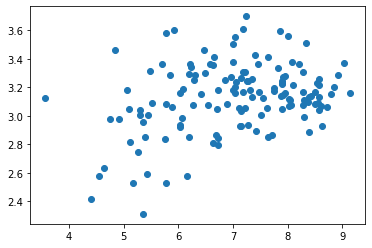

In [19]:
dx = pd.DataFrame(X)
dy = pd.DataFrame(Y)

fig, ax = plt.subplots()
ax.scatter(dy['real_gdp_per_work_pop_2018'], dx['savings'])
#ax.scatter(dy['real_gdp_per_work_pop_2018'], dx['(n+g+delta)'])

# Regression Model: Baseline + Human Capital

In [20]:
# regression with PWT's HC
df3 = pwt[['countrycode', 'country', 'year', 'labsh', 'delta', 'rgdpna', 'pop', 'hc']]
df3.rename(columns = {'countrycode': 'country_code'}, inplace = True)
df3.rename(columns = {'labsh': 'labour_share_income'}, inplace = True)
df3.rename(columns = {'rgdpna': 'real_gdp'}, inplace = True)

# remove rows for years before 1989 and after 2018
df3 = df3[df3['year'] > 1989]
df3 = df3[df3['year'] < 2019]

/Users/lack/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
df1

,country_code,year,gdp_growth,work_pop,pop_growth,kgdp
30,AFG,1990.0,NaN,6139034.0,4.476954,NaN
31,AFG,1991.0,NaN,6588374.0,6.900124,NaN
32,AFG,1992.0,NaN,7186256.0,8.546107,NaN
33,AFG,1993.0,NaN,7849519.0,8.790897,NaN
34,AFG,1994.0,NaN,8480128.0,7.659796,NaN
35,AFG,1995.0,NaN,9021453.0,5.884279,NaN
36,AFG,1996.0,NaN,9343589.0,4.019478,NaN
37,AFG,1997.0,NaN,9543910.0,2.636502,NaN
38,AFG,1998.0,NaN,9691968.0,1.947344,NaN
39,AFG,1999.0,NaN,9874319.0,2.170429,NaN


In [ ]:
hc_df = pd.merge(df1, df3)
hc_df = hc_df.dropna()
hc_df

In [ ]:
# data transformations & creation

# create: capital share of income & adjust decimals
hc_df['capital_share_income'] = round(1 - hc_df['labour_share_income'], 2)

# adjust scales & decimals
hc_df['delta'] = hc_df['delta'] * 100
hc_df['real_gdp'] = hc_df['real_gdp'] /10

# adjust decimals only
#df['gdp_growth'] = round(df['gdp_growth'], 2)
#df['pop_growth'] = round(df['pop_growth'], 2)
#df['savings'] = round(df['kgdp'], 2)

# create: real gdp per capita & decimals
hc_df['real_gdp_per_capita'] = hc_df['real_gdp'] / hc_df['pop']
hc_df['(n+g+delta)'] = hc_df['pop_growth'] + hc_df['gdp_growth'] + hc_df['delta']

hc_df = hc_df.dropna()

In [ ]:
hc_df_regression = hc_df.groupby(['country_code'])['savings', '(n+g+delta)', 'pop', 'hc'].agg('mean')
hc_df_regression = df_regression[df_regression['pop'] > 1]

hc_df_regression = hc_df_regression.drop('AGO')# zero savings
hc_df_regression = hc_df_regression.drop('QAT')# large outlier n+g+delta
hc_df_regression = hc_df_regression.drop('UKR')# extrme small outlier n+g+delta

hc_df